#### ライブラリのインポート

In [43]:
import pandas as pd
import importlib
import suumo
importlib.reload(suumo)

text = """
名称、カテゴリー、アドレス、アクセス
路線、駅、バス停、
MMまで、バス、徒歩、車、合計時間（分）
築年数、構造、階数、
家賃、管理費、敷金、礼金（万円）
間取り、面積、URL
"""


#### データの読み込み

In [44]:
df = suumo.read_csv("./data/yokohama_kawasaki.csv", index_col=0, encoding="utf-8")


#### データの確認

In [45]:
df.describe()


,MMまで,バス,徒歩,車,合計時間,築年数,構造,階数,家賃,管理費,敷金,礼金,面積
count,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000,70128.00000
mean,29.508085,1.152222,13.259155,0.042922,43.962383,21.849076,3.994539,2.544975,7.795544,0.398524,5.319702,4.701743,30.91273
std,13.806222,4.210051,8.084315,0.722126,16.537229,14.675355,3.333423,2.273292,4.550568,0.392495,9.024603,6.959258,18.78029
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,-5.000000,1.300000,0.000000,0.000000,0.000000,6.94000
25%,20.000000,0.000000,7.000000,0.000000,32.000000,8.000000,2.000000,1.000000,5.450000,0.200000,0.000000,0.000000,19.57000
50%,27.000000,0.000000,12.000000,0.000000,41.000000,22.000000,3.000000,2.000000,6.800000,0.300000,4.200000,0.000000,23.41500
75%,38.000000,0.000000,18.000000,0.000000,54.000000,34.000000,5.000000,3.000000,8.500000,0.550000,7.700000,7.600000,38.88000
max,72.000000,112.000000,83.000000,23.000000,143.000000,96.000000,59.000000,58.000000,150.000000,48.000000,600.000000,165.620000,327.64000


#### グラフ化

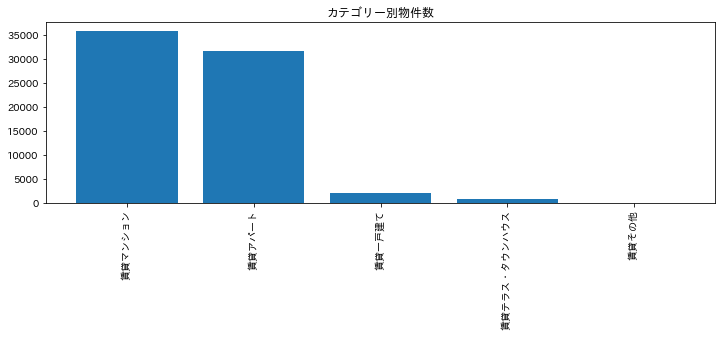

In [46]:
df.n_rooms("カテゴリー")


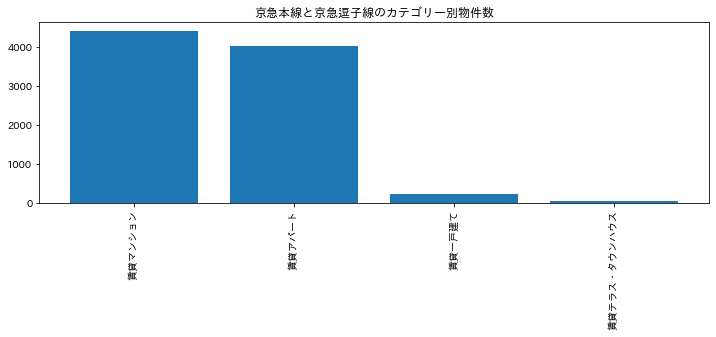

In [47]:
df.n_rooms_by_line(["京急本線", "京急逗子線"], "カテゴリー")


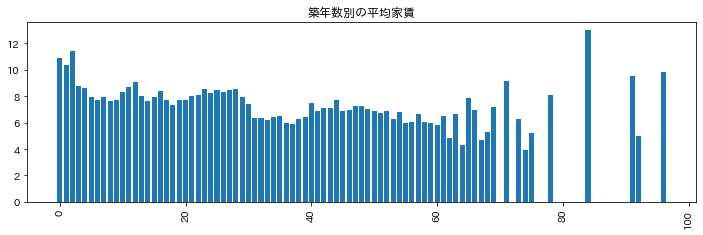

In [48]:
df.ranking_bar("築年数", "家賃")


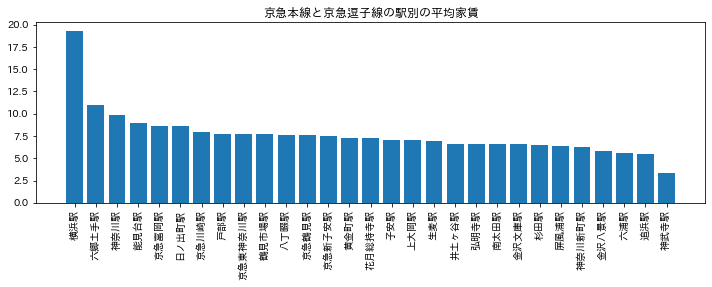

In [49]:
df.ranking_bar_by_line(["京急本線", "京急逗子線"], "駅", "家賃")


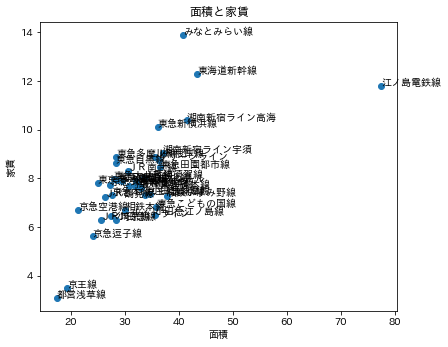

In [50]:
df.scatter_line("面積", "家賃")


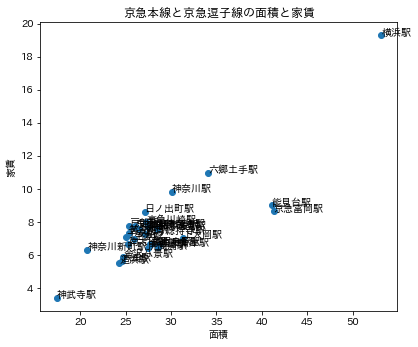

In [51]:
df.scatter_station(["京急本線", "京急逗子線"], "面積", "家賃")


#### データの抽出

In [52]:
# 家賃の列の抽出
df["家賃"]


0        8.0
1        6.0
2        5.9
3        8.3
4        6.1
        ... 
70123    9.0
70124    9.0
70125    4.7
70126    7.2
70127    5.3
Name: 家賃, Length: 70128, dtype: float64

In [53]:
# 家賃の列のindex=2の行の抽出
df["家賃"][2]


5.9

In [54]:
# 0列目の2行目の抽出
df.iloc[0, 2]


'神奈川県横浜市鶴見区市場上町'

In [55]:
# 家賃の値が10未満のデータの抽出
df[df["家賃"] < 10]


,名称,カテゴリー,アドレス,アクセス,路線,駅,バス停,MMまで,バス,徒歩,...,築年数,構造,階数,家賃,管理費,敷金,礼金,間取り,面積,URL
0,グランデパール,賃貸マンション,神奈川県横浜市鶴見区市場上町,ＪＲ鶴見線/鶴見駅 歩19分,ＪＲ鶴見線,鶴見駅,NaN,22,0,19,...,12,5,2,8.0,0.70,0.00,0.0,1K,30.39,https://suumo.jp/chintai/jnc_000013652979/?bc=...
1,ライトマルシェ,賃貸アパート,神奈川県横浜市鶴見区市場東中町,京急本線/八丁畷駅 歩10分,京急本線,八丁畷駅,NaN,26,0,10,...,15,3,1,6.0,0.00,6.00,6.0,ワンルーム,11.00,https://suumo.jp/chintai/jnc_000013653014/?bc=...
2,ライトマルシェ,賃貸アパート,神奈川県横浜市鶴見区市場東中町,京急本線/鶴見市場駅 歩1分,京急本線,鶴見市場駅,NaN,25,0,1,...,15,3,2,5.9,0.10,0.00,0.0,ワンルーム,11.56,https://suumo.jp/chintai/jnc_000013653015/?bc=...
3,京急本線 鶴見市場駅 10階建 築8年,賃貸マンション,神奈川県横浜市鶴見区市場富士見町,ＪＲ南武線/八丁畷駅 歩14分,ＪＲ南武線,八丁畷駅,NaN,26,0,14,...,8,10,8,8.3,0.55,0.00,8.3,1K,28.32,https://suumo.jp/chintai/jnc_000013653085/?bc=...
4,ＪＲ京浜東北線 鶴見駅 2階建 築10年,賃貸アパート,神奈川県横浜市鶴見区潮田町１,ＪＲ京浜東北線/鶴見駅 歩11分,ＪＲ京浜東北線,鶴見駅,NaN,22,0,11,...,10,2,1,6.1,0.35,0.00,0.0,ワンルーム,13.92,https://suumo.jp/chintai/jnc_000013653171/?bc=...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70123,テラス栗平エヌ,賃貸アパート,神奈川県川崎市麻生区栗平１,小田急多摩線/五月台駅 歩18分,小田急多摩線,五月台駅,NaN,67,0,18,...,4,2,1,9.0,0.20,9.00,9.0,1LDK,39.81,https://suumo.jp/chintai/jnc_000085604509/?bc=...
70124,小田急多摩線 栗平駅 2階建 築4年,賃貸アパート,神奈川県川崎市麻生区栗平１,小田急多摩線/栗平駅 歩3分,小田急多摩線,栗平駅,NaN,69,0,3,...,4,2,1,9.0,0.20,9.00,9.0,1LDK,39.81,https://suumo.jp/chintai/jnc_000085604510/?bc=...
70125,パノラマタウン,賃貸アパート,神奈川県川崎市麻生区白鳥４,小田急多摩線/黒川駅 歩20分,小田急多摩線,黒川駅,NaN,71,0,20,...,26,2,1,4.7,0.20,22.09,0.0,1K,22.60,https://suumo.jp/chintai/jnc_000085604511/?bc=...
70126,ＮＯＢ ＨＯＳＯＹＡＭＡ,賃貸マンション,神奈川県川崎市麻生区細山３,小田急線/百合ヶ丘駅 歩19分,小田急線,百合ヶ丘駅,NaN,62,0,19,...,31,4,4,7.2,0.30,7.20,0.0,2LDK,53.00,https://suumo.jp/chintai/jnc_000085604512/?bc=...
